## PHYS123 Group Homework Project

### Wolf Mermelstein, Sara Elanchezhian, Mathew Gummere
### December 2, 2023

# Part G1

Calculating and plotting the recursively defined function
$$x_{n+1} = R x_n (1 - x_n)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Iterator

"""
Generator that continuously yields logistics equation values at x_0 for some growth rate R.

Args:
    R: The growth rate.
    x_0: The initial x value.

Yields:
    The next value of the logistics equation.
"""
def compute_logistics_equation_values(R: float, x_0: float) -> Iterator[float]:
    x_prev = x_0
    while True:
        x_prev = R * x_prev * (1 - x_prev)
        yield x_prev

"""
Plot the logistics equation for a given value of x_0 and R.

Args:
    R: The growth rate.
    x_0 The initial x value.
    n: Number of iterations.
"""
def plot_logistics_equation(R: float, x_0: float, N: int) -> None:
    # Compute values
    x_values = np.fromiter(compute_logistics_equation_values(R, x_0), float, count=N)
    iteration_counts = np.arange(N)

    # Construct the plot
    plt.figure(figsize=(10, 6))
    plt.plot(iteration_counts, x_values, marker='o', linestyle='-', color='b')
    plt.title(f'Logistic Equation (r={R}, x0={x_0})')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.grid(True)
    plt.show()

In [ ]:
# Create the plot with the example R value 3.6
plot_logistics_equation(3.6, 0.4, 120)

# Part G2

Finding values of $R_n$ where the logisics equation switches from

* Period 1 to period 2, $R_1$
* Period 2 to period 4, $R_2$
* Period 4 to period 8, $R_3$
* Period 8 to period 16, $R_4$
* Period 16 to period 32, $R_5$

In [ ]:
# Create the plot for various R values to observe behavior
plot_logistics_equation(3.1, 0.4, 120)
plot_logistics_equation(3.62, 0.4, 120)


# Part G5

Consider the logisics equation $x_{n+1} = R x_n (1 - x_n)$ with the growth parameter set to
$R = 3.6$. 

Define a sequence $x_{true}$ to be set of the $x_n$ calculated with $R = 3.6$ and $x_0 = 0.5$

Define a sequence $x_{pred}$ to be set of the $x_n$ calculated with $R = 3.6$ and $x_0 = 0.5 + \epsilon $. 

The idea is that even a small error $\epsilon$ in the initial conditon will lead to predicted values that vary wildly from the "true" values.

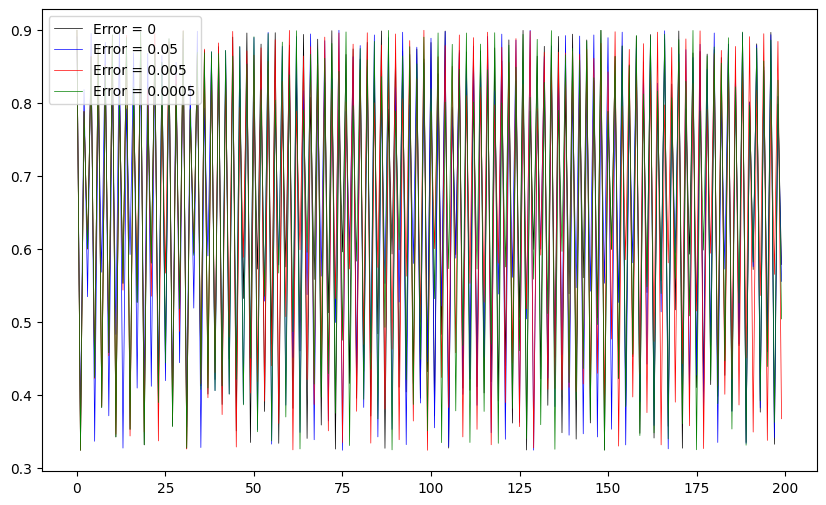

In [57]:
x_0 = 0.5
R = 3.6
N = 200

# Create an array of incrementing numbers for the iteration counts
iteration_counts = np.arange(N)

"""Add an error to an x_0 value."""
def with_error(x_0, error):
    return x_0 + error

"""Build an array of x values for a given error value."""
def compute_x_values(x_0, error=0):
    return np.fromiter(compute_logistics_equation_values(R, with_error(x_0, error)), float, count=N)

# Construct the plots one by one
def plot_y_axis(axes, x_values, y_values, color, label, width=.5):
    ax1.plot(x_values, y_values, color=color, label=label, linewidth=width)
    ax3.set_ylabel(label, color=color)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create y axis for the various errors
errors = (0, 0.05, 0.005, 0.0005)
colors = ('black', 'blue', 'red', 'green')

# Initial value for x axis
iteration_count_start = 0

# Plot the data
for error, color in zip(errors, colors):
    values = compute_x_values(x_0, error)[iteration_count_start:]
    label = f'Error = {error}'
    plot_y_axis(ax1, iteration_counts, values, color=color, label=label)
    
# Add a legand
ax1.legend(loc='upper left')

# Show the plot
plt.show()